In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML 

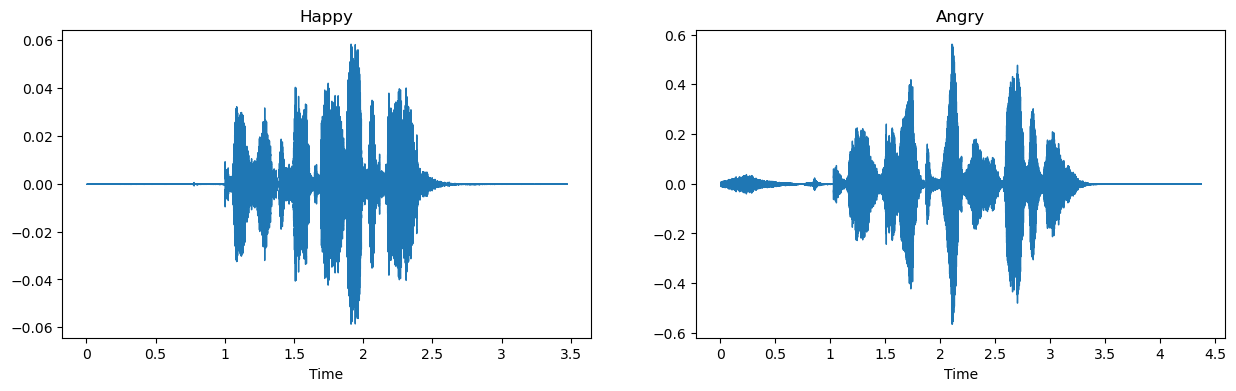

In [2]:
with soundfile.SoundFile('.\\RAVDESS dataset\\actor_01\\03-01-03-01-01-01-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Happy')

with soundfile.SoundFile('.\\RAVDESS dataset\\actor_01\\03-01-05-02-01-02-01.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Angry')

In [3]:
import librosa

def feature_chromagram(waveform, sample_rate):
    stft_spectrogram=np.abs(librosa.stft(waveform))
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
    return mfc_coefficients

In [4]:
def get_features(file):
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)
        mfc_coefficients = feature_mfcc(waveform, sample_rate)

        print(chromagram.shape, melspectrogram.shape, mfc_coefficients.shape)
        feature_matrix=np.array([])
        feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))
        
        return feature_matrix

In [5]:
#Emotions in the RAVDESS dataset
emotions ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob(".\\RAVDESS dataset\\actor_*\\*.wav"):
        if count > 1430:
            break
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        try:
            features = get_features(file)
        except:
            continue
        X.append(features)
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1440} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)


features, emotions = load_data()

(12,) (128,) (40,)
 Processed 1/1440 audio samples (12,) (128,) (40,)
 Processed 2/1440 audio samples (12,) (128,) (40,)
 Processed 3/1440 audio samples (12,) (128,) (40,)
 Processed 4/1440 audio samples (12,) (128,) (40,)
 Processed 5/1440 audio samples (12, 172972) (128, 172972) (40, 172972)
(12,) (128,) (40,)
 Processed 6/1440 audio samples (12,) (128,) (40,)
 Processed 7/1440 audio samples (12,) (128,) (40,)
 Processed 8/1440 audio samples (12,) (128,) (40,)
 Processed 9/1440 audio samples (12,) (128,) (40,)
 Processed 10/1440 audio samples (12,) (128,) (40,)
 Processed 11/1440 audio samples (12,) (128,) (40,)
 Processed 12/1440 audio samples (12,) (128,) (40,)
 Processed 13/1440 audio samples (12,) (128,) (40,)
 Processed 14/1440 audio samples (12,) (128,) (40,)
 Processed 15/1440 audio samples (12,) (128,) (40,)
 Processed 16/1440 audio samples (12,) (128,) (40,)
 Processed 17/1440 audio samples (12,) (128,) (40,)
 Processed 18/1440 audio samples (12,) (128,) (40,)
 Processed 19/

 Processed 157/1440 audio samples (12,) (128,) (40,)
 Processed 158/1440 audio samples (12,) (128,) (40,)
 Processed 159/1440 audio samples (12,) (128,) (40,)
 Processed 160/1440 audio samples (12,) (128,) (40,)
 Processed 161/1440 audio samples (12,) (128,) (40,)
 Processed 162/1440 audio samples (12,) (128,) (40,)
 Processed 163/1440 audio samples (12,) (128,) (40,)
 Processed 164/1440 audio samples (12,) (128,) (40,)
 Processed 165/1440 audio samples (12,) (128,) (40,)
 Processed 166/1440 audio samples (12,) (128,) (40,)
 Processed 167/1440 audio samples (12,) (128,) (40,)
 Processed 168/1440 audio samples (12,) (128,) (40,)
 Processed 169/1440 audio samples (12,) (128,) (40,)
 Processed 170/1440 audio samples (12,) (128,) (40,)
 Processed 171/1440 audio samples (12,) (128,) (40,)
 Processed 172/1440 audio samples (12,) (128,) (40,)
 Processed 173/1440 audio samples (12,) (128,) (40,)
 Processed 174/1440 audio samples (12,) (128,) (40,)
 Processed 175/1440 audio samples (12,) (128,)

 Processed 312/1440 audio samples (12,) (128,) (40,)
 Processed 313/1440 audio samples (12,) (128,) (40,)
 Processed 314/1440 audio samples (12,) (128,) (40,)
 Processed 315/1440 audio samples (12,) (128,) (40,)
 Processed 316/1440 audio samples (12,) (128,) (40,)
 Processed 317/1440 audio samples (12,) (128,) (40,)
 Processed 318/1440 audio samples (12,) (128,) (40,)
 Processed 319/1440 audio samples (12,) (128,) (40,)
 Processed 320/1440 audio samples (12,) (128,) (40,)
 Processed 321/1440 audio samples (12,) (128,) (40,)
 Processed 322/1440 audio samples (12,) (128,) (40,)
 Processed 323/1440 audio samples (12,) (128,) (40,)
 Processed 324/1440 audio samples (12,) (128,) (40,)
 Processed 325/1440 audio samples (12,) (128,) (40,)
 Processed 326/1440 audio samples (12,) (128,) (40,)
 Processed 327/1440 audio samples (12,) (128,) (40,)
 Processed 328/1440 audio samples (12,) (128,) (40,)
 Processed 329/1440 audio samples (12,) (128,) (40,)
 Processed 330/1440 audio samples (12,) (128,)

 Processed 466/1440 audio samples (12,) (128,) (40,)
 Processed 467/1440 audio samples (12,) (128,) (40,)
 Processed 468/1440 audio samples (12,) (128,) (40,)
 Processed 469/1440 audio samples (12,) (128,) (40,)
 Processed 470/1440 audio samples (12,) (128,) (40,)
 Processed 471/1440 audio samples (12,) (128,) (40,)
 Processed 472/1440 audio samples (12,) (128,) (40,)
 Processed 473/1440 audio samples (12,) (128,) (40,)
 Processed 474/1440 audio samples (12,) (128,) (40,)
 Processed 475/1440 audio samples (12,) (128,) (40,)
 Processed 476/1440 audio samples (12,) (128,) (40,)
 Processed 477/1440 audio samples (12,) (128,) (40,)
 Processed 478/1440 audio samples (12,) (128,) (40,)
 Processed 479/1440 audio samples (12,) (128,) (40,)
 Processed 480/1440 audio samples (12,) (128,) (40,)
 Processed 481/1440 audio samples (12,) (128,) (40,)
 Processed 482/1440 audio samples (12,) (128,) (40,)
 Processed 483/1440 audio samples (12,) (128,) (40,)
 Processed 484/1440 audio samples (12,) (128,)

 Processed 620/1440 audio samples (12,) (128,) (40,)
 Processed 621/1440 audio samples (12,) (128,) (40,)
 Processed 622/1440 audio samples (12,) (128,) (40,)
 Processed 623/1440 audio samples (12,) (128,) (40,)
 Processed 624/1440 audio samples (12,) (128,) (40,)
 Processed 625/1440 audio samples (12,) (128,) (40,)
 Processed 626/1440 audio samples (12,) (128,) (40,)
 Processed 627/1440 audio samples (12,) (128,) (40,)
 Processed 628/1440 audio samples (12,) (128,) (40,)
 Processed 629/1440 audio samples (12,) (128,) (40,)
 Processed 630/1440 audio samples (12,) (128,) (40,)
 Processed 631/1440 audio samples (12,) (128,) (40,)
 Processed 632/1440 audio samples (12,) (128,) (40,)
 Processed 633/1440 audio samples (12,) (128,) (40,)
 Processed 634/1440 audio samples (12,) (128,) (40,)
 Processed 635/1440 audio samples (12,) (128,) (40,)
 Processed 636/1440 audio samples (12,) (128,) (40,)
 Processed 637/1440 audio samples (12,) (128,) (40,)
 Processed 638/1440 audio samples (12,) (128,)

 Processed 775/1440 audio samples (12,) (128,) (40,)
 Processed 776/1440 audio samples (12,) (128,) (40,)
 Processed 777/1440 audio samples (12,) (128,) (40,)
 Processed 778/1440 audio samples (12,) (128,) (40,)
 Processed 779/1440 audio samples (12,) (128,) (40,)
 Processed 780/1440 audio samples (12,) (128,) (40,)
 Processed 781/1440 audio samples (12,) (128,) (40,)
 Processed 782/1440 audio samples (12,) (128,) (40,)
 Processed 783/1440 audio samples (12,) (128,) (40,)
 Processed 784/1440 audio samples (12,) (128,) (40,)
 Processed 785/1440 audio samples (12,) (128,) (40,)
 Processed 786/1440 audio samples (12,) (128,) (40,)
 Processed 787/1440 audio samples (12,) (128,) (40,)
 Processed 788/1440 audio samples (12,) (128,) (40,)
 Processed 789/1440 audio samples (12,) (128,) (40,)
 Processed 790/1440 audio samples (12,) (128,) (40,)
 Processed 791/1440 audio samples (12,) (128,) (40,)
 Processed 792/1440 audio samples (12,) (128,) (40,)
 Processed 793/1440 audio samples (12,) (128,)

 Processed 930/1440 audio samples (12,) (128,) (40,)
 Processed 931/1440 audio samples (12,) (128,) (40,)
 Processed 932/1440 audio samples (12,) (128,) (40,)
 Processed 933/1440 audio samples (12,) (128,) (40,)
 Processed 934/1440 audio samples (12,) (128,) (40,)
 Processed 935/1440 audio samples (12,) (128,) (40,)
 Processed 936/1440 audio samples (12,) (128,) (40,)
 Processed 937/1440 audio samples (12,) (128,) (40,)
 Processed 938/1440 audio samples (12,) (128,) (40,)
 Processed 939/1440 audio samples (12,) (128,) (40,)
 Processed 940/1440 audio samples (12,) (128,) (40,)
 Processed 941/1440 audio samples (12,) (128,) (40,)
 Processed 942/1440 audio samples (12,) (128,) (40,)
 Processed 943/1440 audio samples (12,) (128,) (40,)
 Processed 944/1440 audio samples (12,) (128,) (40,)
 Processed 945/1440 audio samples (12,) (128,) (40,)
 Processed 946/1440 audio samples (12,) (128,) (40,)
 Processed 947/1440 audio samples (12,) (128,) (40,)
 Processed 948/1440 audio samples (12,) (128,)

 Processed 1083/1440 audio samples (12,) (128,) (40,)
 Processed 1084/1440 audio samples (12,) (128,) (40,)
 Processed 1085/1440 audio samples (12,) (128,) (40,)
 Processed 1086/1440 audio samples (12,) (128,) (40,)
 Processed 1087/1440 audio samples (12,) (128,) (40,)
 Processed 1088/1440 audio samples (12,) (128,) (40,)
 Processed 1089/1440 audio samples (12,) (128,) (40,)
 Processed 1090/1440 audio samples (12,) (128,) (40,)
 Processed 1091/1440 audio samples (12,) (128,) (40,)
 Processed 1092/1440 audio samples (12,) (128,) (40,)
 Processed 1093/1440 audio samples (12,) (128,) (40,)
 Processed 1094/1440 audio samples (12,) (128,) (40,)
 Processed 1095/1440 audio samples (12,) (128,) (40,)
 Processed 1096/1440 audio samples (12,) (128,) (40,)
 Processed 1097/1440 audio samples (12,) (128,) (40,)
 Processed 1098/1440 audio samples (12,) (128,) (40,)
 Processed 1099/1440 audio samples (12,) (128,) (40,)
 Processed 1100/1440 audio samples (12,) (128,) (40,)
 Processed 1101/1440 audio s

 Processed 1234/1440 audio samples (12,) (128,) (40,)
 Processed 1235/1440 audio samples (12,) (128,) (40,)
 Processed 1236/1440 audio samples (12,) (128,) (40,)
 Processed 1237/1440 audio samples (12,) (128,) (40,)
 Processed 1238/1440 audio samples (12,) (128,) (40,)
 Processed 1239/1440 audio samples (12,) (128,) (40,)
 Processed 1240/1440 audio samples (12,) (128,) (40,)
 Processed 1241/1440 audio samples (12,) (128,) (40,)
 Processed 1242/1440 audio samples (12,) (128,) (40,)
 Processed 1243/1440 audio samples (12,) (128,) (40,)
 Processed 1244/1440 audio samples (12,) (128,) (40,)
 Processed 1245/1440 audio samples (12,) (128,) (40,)
 Processed 1246/1440 audio samples (12,) (128,) (40,)
 Processed 1247/1440 audio samples (12,) (128,) (40,)
 Processed 1248/1440 audio samples (12,) (128,) (40,)
 Processed 1249/1440 audio samples (12,) (128,) (40,)
 Processed 1250/1440 audio samples (12,) (128,) (40,)
 Processed 1251/1440 audio samples (12,) (128,) (40,)
 Processed 1252/1440 audio s

 Processed 1389/1440 audio samples (12,) (128,) (40,)
 Processed 1390/1440 audio samples (12,) (128,) (40,)
 Processed 1391/1440 audio samples (12,) (128,) (40,)
 Processed 1392/1440 audio samples (12,) (128,) (40,)
 Processed 1393/1440 audio samples (12,) (128,) (40,)
 Processed 1394/1440 audio samples (12,) (128,) (40,)
 Processed 1395/1440 audio samples (12,) (128,) (40,)
 Processed 1396/1440 audio samples (12,) (128,) (40,)
 Processed 1397/1440 audio samples (12,) (128,) (40,)
 Processed 1398/1440 audio samples (12,) (128,) (40,)
 Processed 1399/1440 audio samples (12,) (128,) (40,)
 Processed 1400/1440 audio samples (12,) (128,) (40,)
 Processed 1401/1440 audio samples (12,) (128,) (40,)
 Processed 1402/1440 audio samples (12,) (128,) (40,)
 Processed 1403/1440 audio samples (12,) (128,) (40,)
 Processed 1404/1440 audio samples (12,) (128,) (40,)
 Processed 1405/1440 audio samples (12,) (128,) (40,)
 Processed 1406/1440 audio samples (12,) (128,) (40,)
 Processed 1407/1440 audio s

In [6]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) # make it pretty for display
features_df


Audio samples represented: 1431
Numerical features extracted per sample: 180


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.762871,0.786685,0.769217,0.768762,0.773605,0.766615,0.770437,0.764894,0.780340,0.761150,...,0.457082,-1.399109,-2.926855,0.013957,-0.490734,-0.570905,0.040399,-1.207217,-1.594982,-1.436487
1,0.747417,0.781693,0.774763,0.755513,0.770826,0.783455,0.754270,0.748580,0.766922,0.768814,...,0.275460,-2.521470,-2.987673,0.409735,-0.484184,-1.398391,0.255203,-0.984978,-2.093061,-1.040791
2,0.767132,0.788347,0.785653,0.786579,0.777644,0.755638,0.761176,0.752333,0.774452,0.743741,...,-0.002119,-0.909152,-3.045955,-0.373294,-0.849145,-0.922105,-0.170320,-1.144423,-1.725613,-1.450560
3,0.765556,0.760809,0.754814,0.773621,0.797597,0.785697,0.754200,0.761343,0.742356,0.725235,...,-0.403806,-1.329651,-2.513405,-0.190276,-0.645949,-0.553919,0.459299,-1.580085,-1.647682,-1.509511
4,0.706621,0.751378,0.765777,0.754597,0.759112,0.770332,0.755594,0.741855,0.750051,0.755684,...,0.206463,-2.188582,-2.835501,0.463746,-1.019167,-1.411441,0.350433,-1.519892,-1.250112,-0.613852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,0.721308,0.708569,0.638990,0.540198,0.519279,0.508984,0.531476,0.557679,0.583135,0.593368,...,6.552504,8.931705,7.658537,6.528150,5.681561,1.899410,0.484201,1.840284,-0.059677,1.095452
1427,0.525534,0.540252,0.489329,0.463375,0.478058,0.500688,0.518164,0.504446,0.512933,0.487396,...,1.754637,2.080208,1.039150,1.135605,0.630518,-0.313561,-0.178453,0.630597,-0.097719,0.573329
1428,0.604026,0.542253,0.500900,0.497487,0.520819,0.534577,0.538706,0.537579,0.583032,0.595916,...,0.184574,-0.660884,0.397160,0.532300,0.632484,1.569467,0.839769,0.893311,1.215920,2.285818
1429,0.562692,0.571856,0.596699,0.606242,0.597173,0.593990,0.563698,0.557384,0.558721,0.541817,...,-0.507297,-2.029436,-1.117374,1.815396,2.668943,1.921878,1.601038,0.266348,-0.824648,0.984252


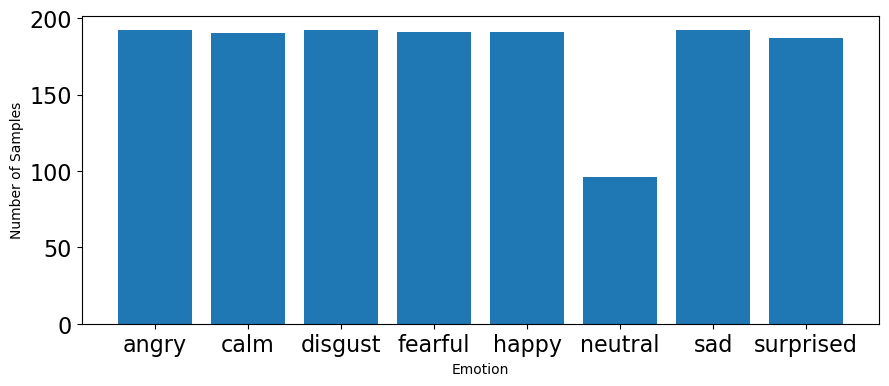

In [7]:
# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features 
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

In [14]:

from sklearn.neural_network import MLPClassifier

# Default 'off-the-shelf' MLP from sklearn
model = MLPClassifier(
    random_state = 69
)

#################### unscaled features #####################
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

model.fit(X_train, y_train)

print(f'Possible emotions predicted by model:{model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Possible emotions predicted by model:['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Unscaled MLP Model's accuracy on training set is 64.60%
Unscaled MLP Model's accuracy on test set is 53.31%


In [17]:
#################### minmax scaled #######################
# Rebuild the training set from the minmax scaled features
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_minmax, X_test_minmax, _, _ = train_test_split(
    features_minmax, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

# Fit the model again on the minmax scaled features
model.fit(X_train_minmax, y_train)

print(f'MinMax scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'MinMax sacled MLP Model\'s accuracy on test set is {100*model.score(X_test_minmax, y_test):.2f}%\n')

#################### standard scaled #######################
# Rebuild the training set from the standard scaled features
# The labels/classes (y_train, y_test) never change, keep old values 
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)
# Fit the model again on the scaled features
model.fit(X_train_scaled, y_train)

print(f'Standard scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'Standard scaled MLP Model\'s accuracy on test set is {100*model.score(X_test_scaled, y_test):.2f}%')

MinMax scaled MLP Model's accuracy on training set is 64.16%
MinMax sacled MLP Model's accuracy on test set is 50.87%

Standard scaled MLP Model's accuracy on training set is 99.21%
Standard scaled MLP Model's accuracy on test set is 66.20%


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=69
)

model = MLPClassifier(
    activation='logistic', 
    solver='adam', 
    alpha=0.001, 
    beta_1=0.9,
    beta_2=0.999,
    batch_size=256, 
    epsilon=1e-08, 
    hidden_layer_sizes=(300,), 
    learning_rate='adaptive',
    max_iter=1000, # I've found for this task, loss converges at ~1000 iterations
    random_state=69,
)

model.fit(X_train, y_train)

print(f'MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'MLP Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

MLP Model's accuracy on training set is 100.00%
MLP Model's accuracy on test set is 64.11%


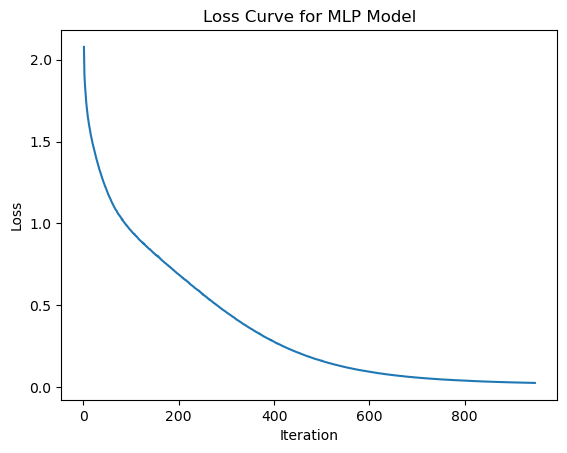

In [20]:
plt.figure()
plt.plot([num for num in range(1,model.n_iter_ +1)], model.loss_curve_)
plt.title('Loss Curve for MLP Model')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

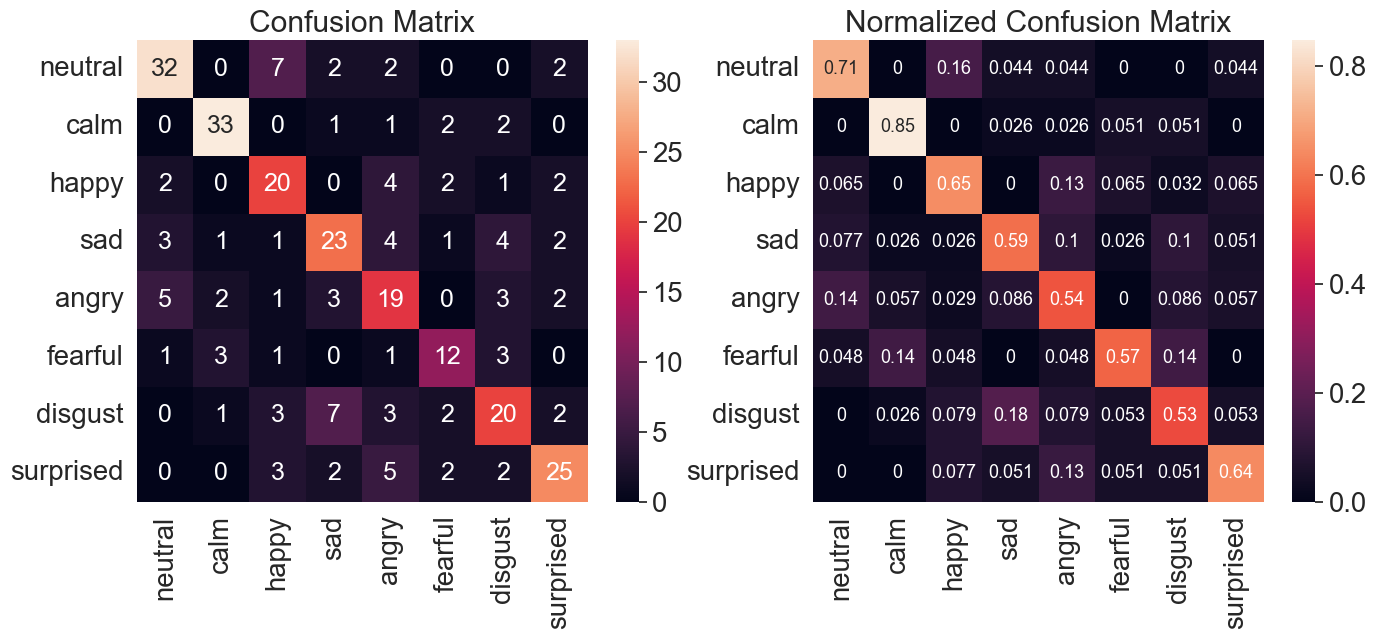

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set 
test_emotion_predictions = model.predict(X_test)
test_emotion_groundtruth = y_test

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions)
conf_matrix_norm = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions,normalize='true')

# set labels for matrix axes from emotions
emotion_list =['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
emotion_name = [emotion for emotion in emotion_list]

# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_name, columns=emotion_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_name, columns=emotion_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


y_pred = model.predict(X_test)
print(f'Test Set Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%') #same as model.score(X_test, y_test)
print(f'Test Set Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

Test Set Accuracy score =  64.111%
Test Set Precision score =  63.429%
Test Set Recall score =  63.422%
Test Set F-score score =  63.3%


In [30]:
file = open("./audio.wav")

for file in glob.glob("./audio.wav"):
    features = get_features(file)
    features = [features]
    features = np.array(features)
    ypred = model.predict(features)


print(ypred)

(12,) (128,) (40,)
['calm']
